In [4]:
import gymnasium
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from utils import visualize_pricing_strategy
from Pricing_Environment import demand_calculator, action_strategy,pricing_env

In [37]:
def visualize_episode_rewards(episode_rewards):
    """
    Visualize the reward obtained in each episode.

    Args:
        episode_rewards (list): A list of total rewards obtained in each episode.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(episode_rewards, label='Reward per Episode', marker='o', linestyle='-')
    plt.title('Reward Received Over Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True, which='both', linestyle='-')
    plt.legend()
    plt.show()

In [5]:
product_config = {
    "min_price": 10,
    "max_price": 100,
    "initial_demand": 0.5,
}

demand_calculator_config = {
    "price_probability_ranges": {
        (0, 50): 0.8,   # 80% demand probability for prices between $0 and $50
        (51, 100): 0.6, # 60% demand probability for prices between $51 and $100
        # Add more ranges and probabilities as needed
    },
}

action_strategy_config = {
    "action_probabilities": {
        0: 0.1,  # Decrease price significantly
        1: 0.2,  # Decrease price slightly
        2: 0.4,  # Keep price
        3: 0.2,  # Increase price slightly
        4: 0.1,  # Increase price significantly
    },
}



Price: 60.0, Market Demand: 0.9395151283636797, Current Demand: 0.5637090770182078
Price: 65.0, Market Demand: 0.6437896326907586, Current Demand: 0.38627377961445514
Price: 60.0, Market Demand: 0.509181642872248, Current Demand: 0.3055089857233488
Price: 60.0, Market Demand: 0.6743818106676103, Current Demand: 0.40462908640056616
Price: 60.0, Market Demand: 1.4508790098611368, Current Demand: 0.8705274059166821
Price: 50.0, Market Demand: 1.1827015184307794, Current Demand: 0.9461612147446236
Price: 40.0, Market Demand: 1.194349632890381, Current Demand: 0.9554797063123049
Price: 35.0, Market Demand: 1.4982346232614745, Current Demand: 1.1985876986091797
Price: 35.0, Market Demand: 1.0952818436213598, Current Demand: 0.8762254748970879
Price: 45.0, Market Demand: 1.3398016429460058, Current Demand: 1.0718413143568046


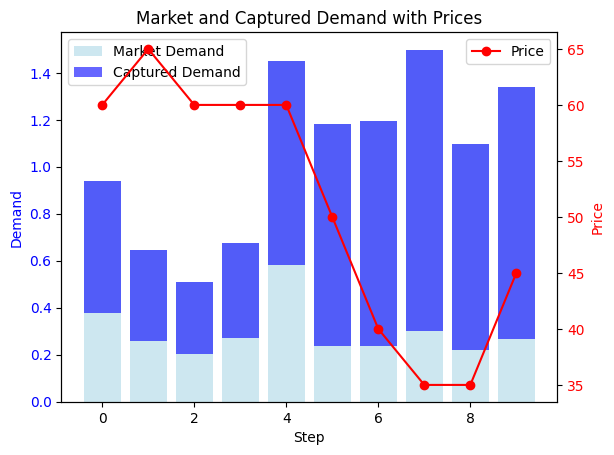

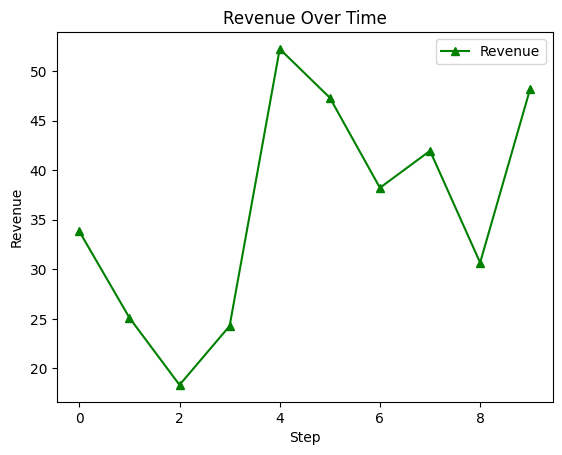

In [6]:
# Initialize the environment and strategy
env = pricing_env.PricingEnvironment(render_mode="text", product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)

strategy = action_strategy.ActionStrategy({
    0: 0.1,  # Decrease price significantly
    1: 0.2,  # Decrease price slightly
    2: 0.4,  # Keep price
    3: 0.2,  # Increase price slightly
    4: 0.1   # Increase price significantly
})

# Number of simulation steps
num_steps = 10

# Simulate external market demands
external_market_demands = np.random.uniform(0.5, 1.5, size=num_steps)

for step in range(num_steps):
    action = strategy.choose_action()
    external_demand = external_market_demands[step]
    
    # Perform a step in the environment with the chosen action and external market demand
    state, reward, done, _ = env.step(action, external_demand)
    
    # Optionally render the environment's state
    env.render()

# Visualize the results in a single line after the loop
visualize_pricing_strategy(env.history)



In [7]:
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_rate=0.95,
                 exploration_rate=1.0, exploration_decay=0.99, min_exploration_rate=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((state_size, action_size))
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.min_exploration_rate = min_exploration_rate

    def act(self, state):
        # Exploration-exploitation trade-off
        if np.random.rand() < self.exploration_rate:
            return np.random.choice(range(self.action_size))
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, done):
        # Update Q-value using the Bellman equation
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_rate * self.q_table[next_state][best_next_action] * (not done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error
        # Decay exploration rate
        if done:
            self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * self.exploration_decay)


In [23]:
def encode_state(market_demand, num_bins=10, max_market_demand=1.5):
    """
    Encodes the market demand into a discrete state based on the ratio of 
    market_demand to the maximum market demand.

    Args:
        market_demand (float): The current market demand from the environment's state.
        num_bins (int): The number of bins to discretize the demand ratio into.
        max_market_demand (float): The maximum possible market demand to normalize the ratio.

    Returns:
        int: A discrete integer representing the encoded state.
    """
    # Normalize market demand
    normalized_demand = market_demand / max_market_demand
    
    # Discretize the normalized demand
    discrete_state = int(normalized_demand * num_bins)
    # Ensure the discrete state is within the bounds [0, num_bins-1]
    discrete_state = min(max(discrete_state, 0), num_bins - 1)
    
    return discrete_state


Episode 1: Total Reward = 15895.733943960056
Episode 2: Total Reward = 14378.165674575348
Episode 3: Total Reward = 20335.95567494156
Episode 4: Total Reward = 21113.564924163697
Episode 5: Total Reward = 17035.336345921256
Episode 6: Total Reward = 21341.23377331083
Episode 7: Total Reward = 23606.37297115652
Episode 8: Total Reward = 23607.288301051965
Episode 9: Total Reward = 22675.730770440827
Episode 10: Total Reward = 18918.422627303808
Episode 11: Total Reward = 25675.23971349131
Episode 12: Total Reward = 21224.185974943986
Episode 13: Total Reward = 24740.952712294114
Episode 14: Total Reward = 19356.537513382777
Episode 15: Total Reward = 23315.77668608038
Episode 16: Total Reward = 20791.46634506091
Episode 17: Total Reward = 23895.90854026557
Episode 18: Total Reward = 23829.64941018043
Episode 19: Total Reward = 21744.99984389366
Episode 20: Total Reward = 20363.91640388684
Episode 21: Total Reward = 18560.327989759076
Episode 22: Total Reward = 23214.884866011424
Episode

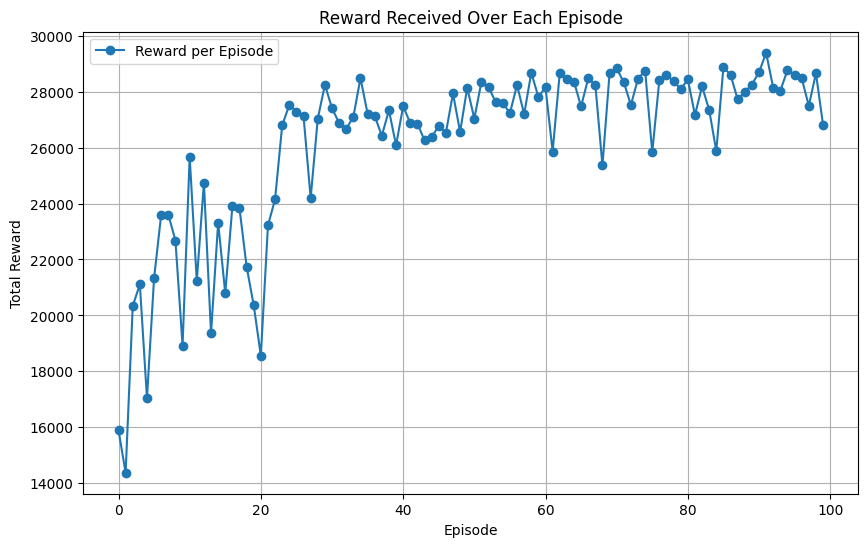

In [41]:
import numpy as np
# Assuming the necessary imports are done, including PricingEnvironment and QLearningAgent

# Initialize the environment with the configs
env = pricing_env.PricingEnvironment(render_mode="text", product_config=product_config, demand_calculator_config=demand_calculator_config, action_strategy_config=action_strategy_config)

# Initialize the Q-learning agent
# Assuming state_size is determined by your environment's specifics
agent = QLearningAgent(state_size=100, action_size=5)
num_bins = 10  # Example bin count for state discretization
state_bounds = [(env.min_price, env.max_price)]

num_episodes = 40
max_steps_per_episode = 250
num_bins = 10  # Define the granularity of your discretization
episode_rewards = []
for episode in range(num_episodes):
    initial_state = env.reset()
    market_demand = initial_state[0]  # Extract market demand from the state
    state = encode_state(market_demand, num_bins=num_bins)  # Encode the initial state
    
    total_reward = 0
    
    for step in range(max_steps_per_episode):
        action = agent.act(state)
        next_state_info, reward, done, _ = env.step(action, np.random.uniform(0.5, 1.5))  # Simulate action and external demand
        next_market_demand = next_state_info[0]  # Extract market demand from the next state
        next_state = encode_state(next_market_demand, num_bins=num_bins)  # Encode the next state

        agent.update(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
        

        if done:
            break
 
    agent.exploration_rate = max(agent.min_exploration_rate, agent.exploration_rate * agent.exploration_decay)
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")
        

    episode_rewards.append(total_reward)   

# Visualization after completing all episodes
visualize_episode_rewards(episode_rewards)


In [34]:
episode_rewards[400]

3137.055062090477